In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [445]:
# Load the dataset
file_path = "task_data/data.csv" # Adjust the file path accordingly
data = pd.read_csv(file_path)

In [447]:

# Convert 'Start Time' to datetime
data['Start Time'] = pd.to_datetime(data['Start Time'])


# Propulsion Efficiency

In [450]:
# Calculate Total Fuel Consumption per hour by summing fuel flow rates across main engines
data['Total Fuel Consumption (kg/h)'] = (
    data['Main Engine 1 Fuel Flow Rate (kg/h)'] +
    data['Main Engine 2 Fuel Flow Rate (kg/h)'] +
    data['Main Engine 3 Fuel Flow Rate (kg/h)'] +
    data['Main Engine 4 Fuel Flow Rate (kg/h)']
)

# Filter out rows with zero Total Fuel Consumption
data_propulsion_efficiency = data[data['Total Fuel Consumption (kg/h)'] > 0].copy()

# Define fuel energy content (MJ/kg) for calculating fuel energy input
fuel_energy_content = 42.7  # MJ/kg

# Calculate Propulsion Efficiency
# Propulsion Efficiency = Total Power Output (MW) / Fuel Energy Input (MJ)
data_propulsion_efficiency['Propulsion Efficiency'] = data_propulsion_efficiency['Propulsion Power (MW)'] / (
    data_propulsion_efficiency['Total Fuel Consumption (kg/h)'] * fuel_energy_content
)

# Aggregate the propulsion efficiency by vessel to get mean 
propulsion_efficiency_summary = data_propulsion_efficiency.groupby('Vessel Name')['Propulsion Efficiency'].agg('mean').reset_index()

# Display the calculated propulsion efficiency summary
print(propulsion_efficiency_summary)


  Vessel Name  Propulsion Efficiency
0    Vessel 1               0.000051
1    Vessel 2               0.000039


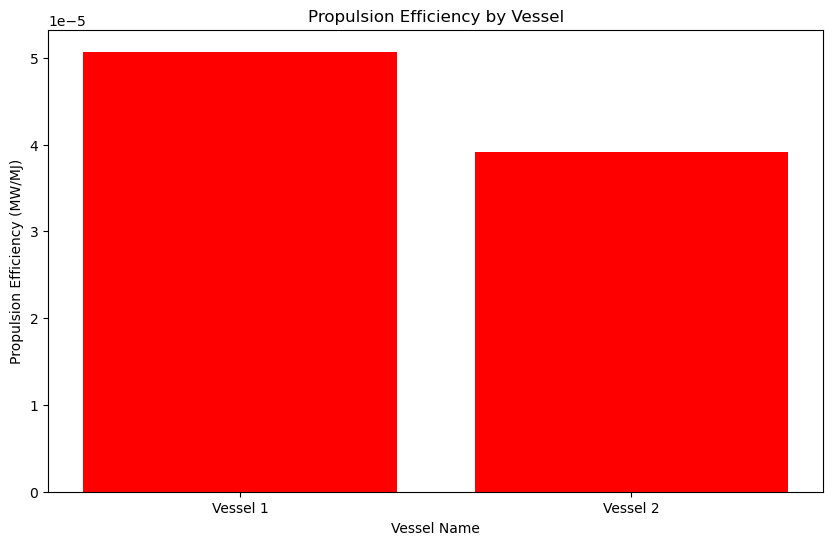

In [370]:

# Set up figure size for clear visualization
plt.figure(figsize=(10, 6))

# Plotting the mean propulsion efficiency 
plt.bar(propulsion_efficiency_summary['Vessel Name'], propulsion_efficiency_summary['Propulsion Efficiency'], capsize=5, color='red')

# Adding titles and labels
plt.title('Propulsion Efficiency by Vessel')
plt.ylabel('Propulsion Efficiency (MW/MJ)')
plt.xlabel('Vessel Name')

# Show the plot
plt.show()


# Energy Efficiency for Auxillary Systems

In [375]:
# Select relevant columns for auxiliary system power analysis
df_auxiliary = data[['Vessel Name', 'Power Galley 1 (MW)', 'Power Galley 2 (MW)', 
                     'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 
                     'HVAC Chiller 3 Power (MW)', 'Scrubber Power (MW)', 'Power Service (MW)',
                     'Speed Over Ground (knots)']].copy()


# Filter out rows with missing or zero values for 'Speed Over Ground (knots)'
df_auxiliary = df_auxiliary[(df_auxiliary['Speed Over Ground (knots)'] > 0) & 
                          df_auxiliary['HVAC Chiller 1 Power (MW)'].notnull() &
                          df_auxiliary['Power Galley 1 (MW)'].notnull() &
                          df_auxiliary['Scrubber Power (MW)'].notnull() &
                          df_auxiliary['Power Service (MW)'].notnull()]

# Calculate total power for each system
df_auxiliary['Total HVAC Power (MW)'] = df_auxiliary['HVAC Chiller 1 Power (MW)'] + df_auxiliary['HVAC Chiller 2 Power (MW)'] + df_auxiliary['HVAC Chiller 3 Power (MW)']
df_auxiliary['Total Galley Power (MW)'] = df_auxiliary['Power Galley 1 (MW)'] + df_auxiliary['Power Galley 2 (MW)']
df_auxiliary['Total Scrubber Power (MW)'] = df_auxiliary['Scrubber Power (MW)']
df_auxiliary['Total Service Power (MW)'] = df_auxiliary['Power Service (MW)']

# Calculate energy efficiency for each system (Total Power / Speed Over Ground)
df_auxiliary['Energy Efficiency HVAC'] = df_auxiliary['Total HVAC Power (MW)'] / df_auxiliary['Speed Over Ground (knots)']
df_auxiliary['Energy Efficiency Galley'] = df_auxiliary['Total Galley Power (MW)'] / df_auxiliary['Speed Over Ground (knots)']
df_auxiliary['Energy Efficiency Scrubber'] = df_auxiliary['Total Scrubber Power (MW)'] / df_auxiliary['Speed Over Ground (knots)']
df_auxiliary['Energy Efficiency Service'] = df_auxiliary['Total Service Power (MW)'] / df_auxiliary['Speed Over Ground (knots)']

# Group by vessel and calculate the mean energy efficiency for each system
auxiliary_efficiency_summary = df_auxiliary.groupby('Vessel Name').mean()

# Display the results
print("Fuel Consumption and Efficiency Summary:")
print(auxiliary_efficiency_summary[['Energy Efficiency HVAC', 'Energy Efficiency Galley', 'Energy Efficiency Scrubber', 'Energy Efficiency Service']])



Fuel Consumption and Efficiency Summary:
             Energy Efficiency HVAC  Energy Efficiency Galley  \
Vessel Name                                                     
Vessel 1                   4.104165                  1.174646   
Vessel 2                  55.100947                 10.654422   

             Energy Efficiency Scrubber  Energy Efficiency Service  
Vessel Name                                                         
Vessel 1                       1.282019                  31.060023  
Vessel 2                       8.674004                 265.829476  


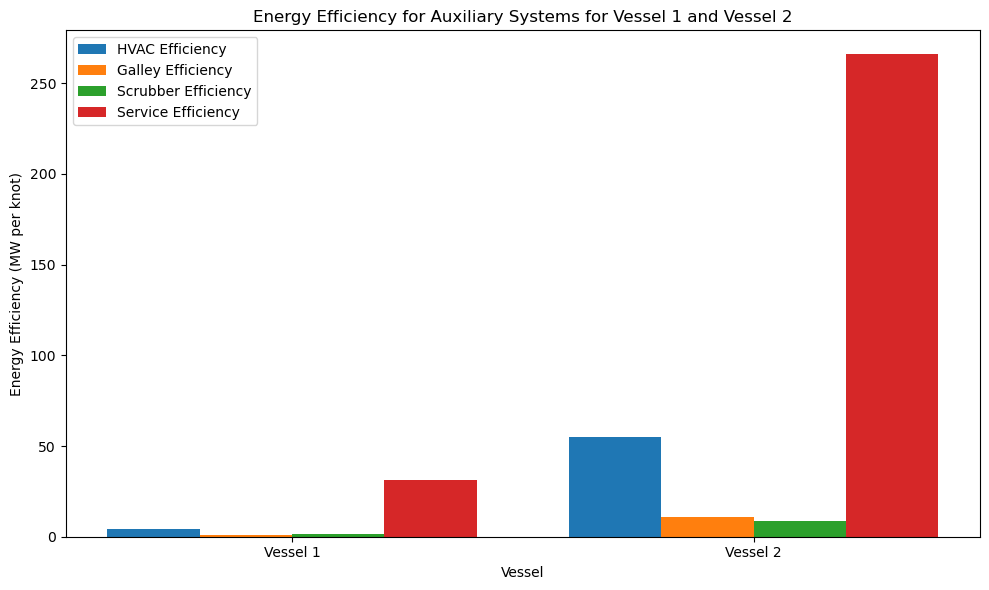

In [378]:

vessels = ['Vessel 1', 'Vessel 2']

# Set up the figure and axes for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and positions for the bars
bar_width = 0.2
index = np.arange(len(vessels))


# Plot bars for each system's efficiency
ax.bar(index - 1.5 * bar_width, auxiliary_efficiency_summary['Energy Efficiency HVAC'], width=bar_width, label='HVAC Efficiency')
ax.bar(index - 0.5 * bar_width, auxiliary_efficiency_summary['Energy Efficiency Galley'], width=bar_width, label='Galley Efficiency')
ax.bar(index + 0.5 * bar_width, auxiliary_efficiency_summary['Energy Efficiency Scrubber'], width=bar_width, label='Scrubber Efficiency')
ax.bar(index + 1.5 * bar_width, auxiliary_efficiency_summary['Energy Efficiency Service'], width=bar_width, label='Service Efficiency')

# Add labels, title, and legend
ax.set_xlabel('Vessel')
ax.set_ylabel('Energy Efficiency (MW per knot)')
ax.set_title('Energy Efficiency for Auxiliary Systems for Vessel 1 and Vessel 2')
ax.set_xticks(index)
ax.set_xticklabels(vessels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Fuel Efficiency

In [383]:

# Select relevant columns for the fuel consumption and propulsion power analysis
df_fuel = data[['Vessel Name','Propulsion Power (MW)', 
                         'Total Fuel Consumption (kg/h)', 
                         'Speed Over Ground (knots)']].copy()



# Drop rows with missing or zero values for fuel flow rate or speed
df_fuel = df_fuel[(df_fuel['Total Fuel Consumption (kg/h)'] > 0) & 
                                        (df_fuel['Speed Over Ground (knots)'] > 0)]



#  Calculate Fuel Efficiency per Knot as Total Fuel Flow Rate divided by Speed Over Ground
df_fuel['Fuel Efficiency per Knot (kg/h per knot)'] = df_fuel['Total Fuel Consumption (kg/h)'] / df_fuel['Speed Over Ground (knots)']

# Calculate Fuel Consumption per Mile as Total Fuel Flow Rate divided by Speed Over Ground (same as for efficiency per knot)
df_fuel['Fuel Consumption per Mile (kg/nm)'] = df_fuel['Total Fuel Consumption (kg/h)'] / df_fuel['Speed Over Ground (knots)']


# Group by vessel and calculate the mean for each metric
fuel_metrics_summary = df_fuel.groupby('Vessel Name').mean()

# Display the results
print("Fuel Consumption and Efficiency Summary:")
print(fuel_metrics_summary[['Total Fuel Consumption (kg/h)', 'Fuel Efficiency per Knot (kg/h per knot)', 'Fuel Consumption per Mile (kg/nm)']])

Fuel Consumption and Efficiency Summary:
             Total Fuel Consumption (kg/h)  \
Vessel Name                                  
Vessel 1                       3202.249316   
Vessel 2                       2877.362256   

             Fuel Efficiency per Knot (kg/h per knot)  \
Vessel Name                                             
Vessel 1                                  7713.122066   
Vessel 2                                 62923.905530   

             Fuel Consumption per Mile (kg/nm)  
Vessel Name                                     
Vessel 1                           7713.122066  
Vessel 2                          62923.905530  


# Load Balancing Efficiency

In [388]:
# To calculate Load Balancing Efficiency, we'll calculate the difference between the port and starboard propulsion power and divide it by the total propulsion power to get a percentage imbalance.
# Calculate the total propulsion power by summing port and starboard propulsion power
data['Total Propulsion Power (MW)'] = data['Port Side Propulsion Power (MW)'] + data['Starboard Side Propulsion Power (MW)']

# Calculate the load balancing efficiency as the percentage of the imbalance compared to the total propulsion power
data['Load Balancing Efficiency (%)'] = (1 - abs(data['Port Side Propulsion Power (MW)'] - data['Starboard Side Propulsion Power (MW)']) / data['Total Propulsion Power (MW)']) * 100

# Group by vessel to calculate the average load balancing efficiency
load_balancing_efficiency_summary = data.groupby('Vessel Name')['Load Balancing Efficiency (%)'].mean()
print(load_balancing_efficiency_summary)

Vessel Name
Vessel 1    96.331948
Vessel 2    96.711019
Name: Load Balancing Efficiency (%), dtype: float64


In [391]:
# Total CO2 emissions = Fuel Consumption * CO2 emission factor
# Using a CO2 emission factor of 3.114 kg CO2 per kg of fuel for marine diesel oil
CO2_emission_factor = 3.114  # kg CO2 per kg fuel
data['Total CO2 Emissions (kg CO2)'] = data['Total Fuel Consumption (kg/h)'] * CO2_emission_factor
# Aggregating the KPIs by Vessel Name for analysis
CO2_emission_summary = data.groupby('Vessel Name').agg({
     'Total CO2 Emissions (kg CO2)': 'sum'
}).reset_index()

print(CO2_emission_summary)

  Vessel Name  Total CO2 Emissions (kg CO2)
0    Vessel 1                  8.574071e+08
1    Vessel 2                  7.681958e+08


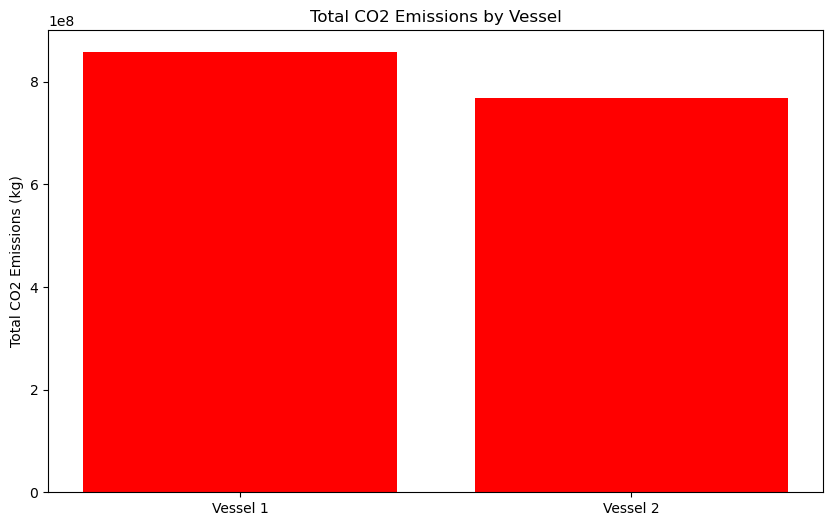

In [394]:
plt.figure(figsize=(10, 6))
plt.bar(CO2_emission_summary['Vessel Name'], CO2_emission_summary['Total CO2 Emissions (kg CO2)'], color='red')
plt.title('Total CO2 Emissions by Vessel')
plt.ylabel('Total CO2 Emissions (kg)')
plt.show()

# Propulsion Power vs Speed 

In [399]:
# Select relevant columns for propulsion power analysis
df_propulsion = data[['Vessel Name', 'Propulsion Power (MW)', 
                    'Port Side Propulsion Power (MW)', 'Starboard Side Propulsion Power (MW)', 
                    'Speed Over Ground (knots)']].copy()

# Drop rows with missing or zero values for propulsion power or speed over ground
df_propulsion = df_propulsion[(df_propulsion['Propulsion Power (MW)'].notnull()) & 
                              (df_propulsion['Speed Over Ground (knots)'] > 0)]

# Group by vessel and calculate the mean propulsion power and speed over ground
propulsion_summary = df_propulsion.groupby('Vessel Name').mean()

# Display the propulsion power efficiency summary
for vessel in propulsion_summary.index:
    print(f"\nVessel: {vessel}")
    print(f"Average Propulsion Power: {propulsion_summary.loc[vessel, 'Propulsion Power (MW)']:.2f} MW")
    print(f"Port Side Propulsion Power: {propulsion_summary.loc[vessel, 'Port Side Propulsion Power (MW)']:.2f} MW")
    print(f"Starboard Side Propulsion Power: {propulsion_summary.loc[vessel, 'Starboard Side Propulsion Power (MW)']:.2f} MW")
    print(f"Average Speed Over Ground: {propulsion_summary.loc[vessel, 'Speed Over Ground (knots)']:.2f} knots")



Vessel: Vessel 1
Average Propulsion Power: 10.34 MW
Port Side Propulsion Power: 5.13 MW
Starboard Side Propulsion Power: 5.20 MW
Average Speed Over Ground: 14.03 knots

Vessel: Vessel 2
Average Propulsion Power: 8.03 MW
Port Side Propulsion Power: 4.03 MW
Starboard Side Propulsion Power: 4.00 MW
Average Speed Over Ground: 11.16 knots


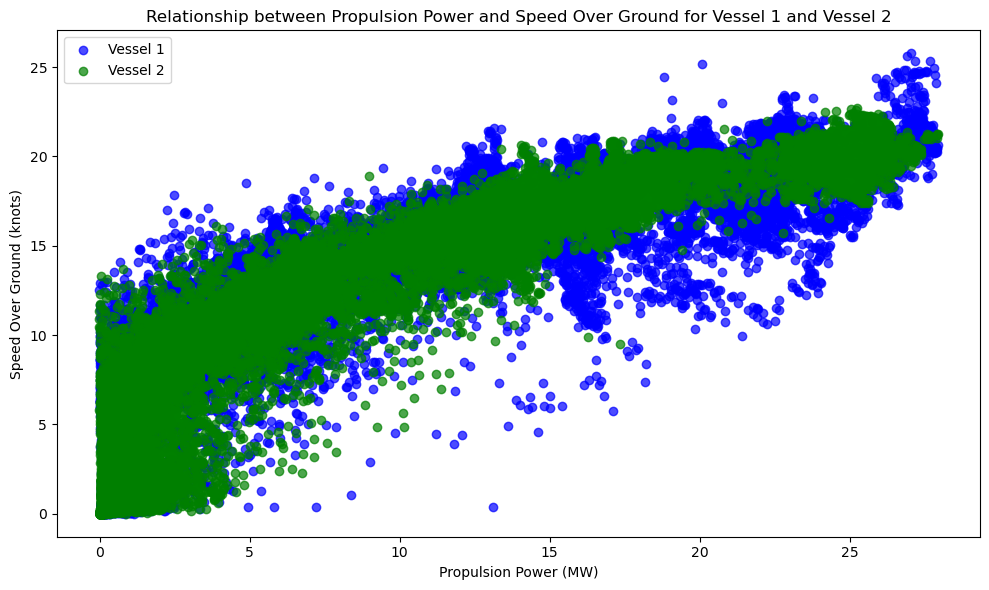

In [402]:

# Re-filtering the data for Vessel 1 and Vessel 2 for the scatter plot

df_vessel_1_propulsion = df_propulsion[df_propulsion['Vessel Name'] == 'Vessel 1']
df_vessel_2_propulsion = df_propulsion[df_propulsion['Vessel Name'] == 'Vessel 2']

# Set up the figure for the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for Vessel 1
plt.scatter(df_vessel_1_propulsion['Propulsion Power (MW)'], df_vessel_1_propulsion['Speed Over Ground (knots)'], label='Vessel 1', color='b', alpha=0.7)

# Scatter plot for Vessel 2
plt.scatter(df_vessel_2_propulsion['Propulsion Power (MW)'], df_vessel_2_propulsion['Speed Over Ground (knots)'], label='Vessel 2', color='g', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Propulsion Power (MW)')
plt.ylabel('Speed Over Ground (knots)')
plt.title('Relationship between Propulsion Power and Speed Over Ground for Vessel 1 and Vessel 2')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Propulsion Power  Vs Fuel Consumption 

In [408]:
# Selecting relevant columns for fuel consumption and propulsion power comparison
df_fuel_propulsion = data[['Vessel Name', 'Propulsion Power (MW)', 
                         'Total Fuel Consumption (kg/h)']].copy()

# Drop rows with missing or zero values for fuel flow rate, propulsion power, or speed
df_fuel_propulsion = df_fuel_propulsion[(df_fuel_propulsion['Total Fuel Consumption (kg/h)'] > 0) & 
                                        (df_fuel_propulsion['Propulsion Power (MW)'].notnull()) ]

# Group by vessel and calculate the mean propulsion power and total fuel consumption
fuel_propulsion_summary = df_fuel_propulsion.groupby('Vessel Name').mean()



for vessel in fuel_propulsion_summary.index:
    print(f"\nVessel: {vessel}")
    print(f"Average Propulsion Power: {fuel_propulsion_summary.loc[vessel, 'Propulsion Power (MW)']:.2f} MW")
    print(f"Average Fuel Flow Rate: {fuel_propulsion_summary.loc[vessel, 'Total Fuel Consumption (kg/h)']:.2f} kg/h")



Vessel: Vessel 1
Average Propulsion Power: 7.66 MW
Average Fuel Flow Rate: 2620.36 kg/h

Vessel: Vessel 2
Average Propulsion Power: 5.86 MW
Average Fuel Flow Rate: 2361.92 kg/h


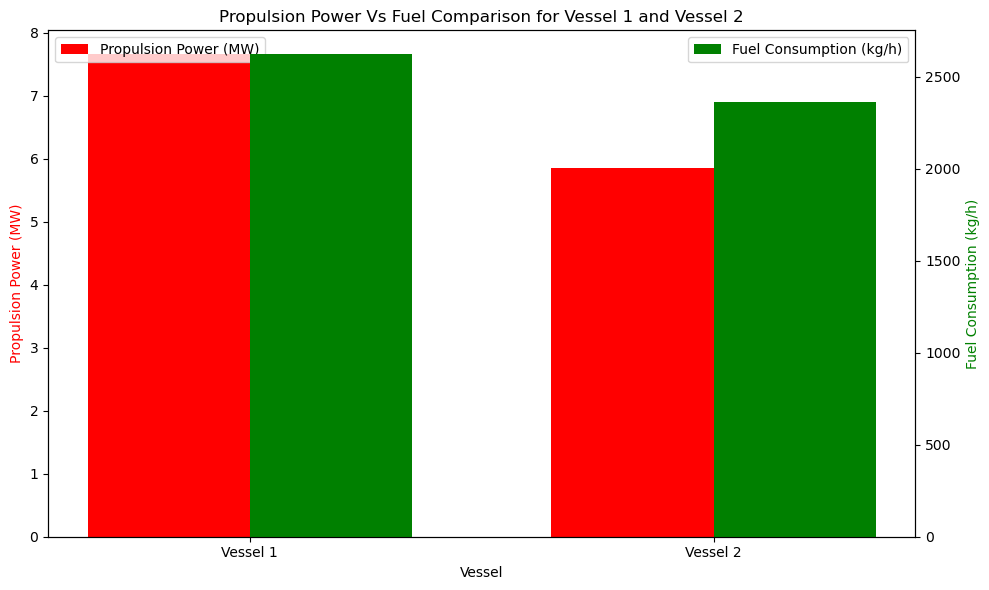

In [411]:
# Set up data for plotting Propulsion Power vs Fuel Consumption for Vessel 1 and Vessel 2
vessels = ['Vessel 1', 'Vessel 2']
propulsion_power = fuel_propulsion_summary['Propulsion Power (MW)']  # From the calculated results
fuel_consumption = fuel_propulsion_summary['Total Fuel Consumption (kg/h)']  # From the calculated results

# Plotting the bar chart for propulsion power  comparison
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width and index for positioning
bar_width = 0.35
index = np.arange(len(vessels))

# Plot Propulsion Power
bar1 = ax1.bar(index, propulsion_power, bar_width, label='Propulsion Power (MW)', color='r')

# Create a second y-axis to show Fuel Consumption
ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width, fuel_consumption, bar_width, label='Fuel Consumption (kg/h)', color='g')

# Add labels and titles
ax1.set_xlabel('Vessel')
ax1.set_ylabel('Propulsion Power (MW)', color='r')
ax2.set_ylabel('Fuel Consumption (kg/h)', color='g')
ax1.set_title('Propulsion Power Vs Fuel Comparison for Vessel 1 and Vessel 2')

# Set tick positions and labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(vessels)

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [416]:
# Selecting relevant columns for thruster power power comparison
df_thruster_power = data[['Vessel Name', 'Bow Thruster 1 Power (MW)', 
                           'Bow Thruster 2 Power (MW)',
                           'Bow Thruster 3 Power (MW)',
                           'Stern Thruster 1 Power (MW)',
                         'Stern Thruster 2 Power (MW)']].copy()

# Calculate total bow thruster power by summing the power across all bow thrusters
df_thruster_power['Total Bow Thruster Power (MW)'] = (
    df_thruster_power['Bow Thruster 1 Power (MW)'] +
    df_thruster_power['Bow Thruster 2 Power (MW)'] +
    df_thruster_power['Bow Thruster 3 Power (MW)']
)

# Calculate total stern thruster power by summing the power across all stern thrusters
df_thruster_power['Total Stern Thruster Power (MW)'] = (
    df_thruster_power['Stern Thruster 1 Power (MW)'] +
    df_thruster_power['Stern Thruster 2 Power (MW)']
)

# Group by Vessel Name to calculate average power for bow and stern thrusters
thruster_power_summary = df_thruster_power.groupby('Vessel Name')[['Total Bow Thruster Power (MW)', 'Total Stern Thruster Power (MW)']].mean().reset_index()

# Display the calculated thruster power summary
print("Thruster Power Summary for Vessel 1 and 2")
print(thruster_power_summary)


Thruster Power Summary for Vessel 1 and 2
  Vessel Name  Total Bow Thruster Power (MW)  Total Stern Thruster Power (MW)
0    Vessel 1                       0.032311                         0.018275
1    Vessel 2                       0.035962                         0.009973


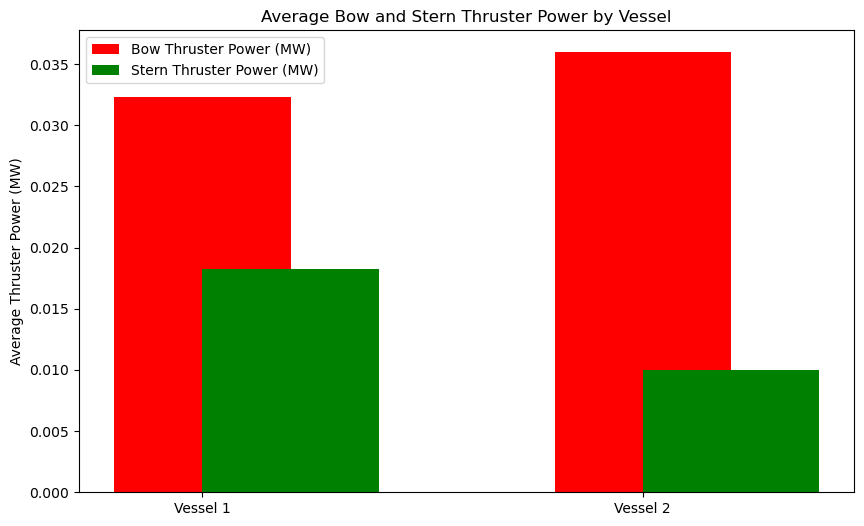

In [419]:
# Set up a side-by-side bar chart to compare bow and stern thruster power for each vessel
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions for the vessels
x = range(len(thruster_power_summary['Vessel Name']))

# Plot bow and stern thruster power side by side for each vessel
ax.bar(x, thruster_power_summary['Total Bow Thruster Power (MW)'], width=0.4, label='Bow Thruster Power (MW)', color='red', align='center')
ax.bar(x, thruster_power_summary['Total Stern Thruster Power (MW)'], width=0.4, label='Stern Thruster Power (MW)', color='green', align='edge')

# Adding titles and labels
ax.set_xticks(x)
ax.set_xticklabels(thruster_power_summary['Vessel Name'])
ax.set_ylabel('Average Thruster Power (MW)')
ax.set_title('Average Bow and Stern Thruster Power by Vessel')
ax.legend()

# Display the plot
plt.show()


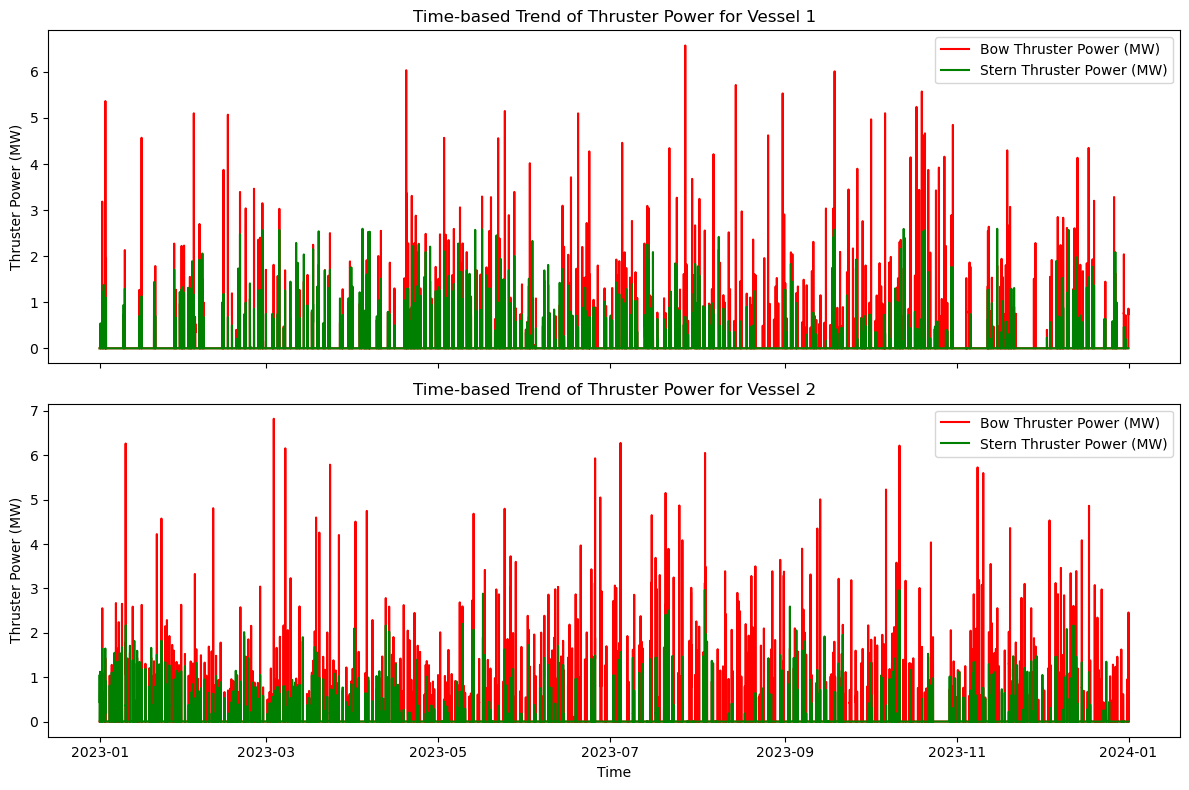

In [422]:

# Set the Start Time as the index for easy time-based plotting
df_thruster_power.set_index(data['Start Time'], inplace=True)

# Select only the relevant columns for thruster power analysis
thruster_time_data = df_thruster_power[['Vessel Name', 'Total Bow Thruster Power (MW)', 'Total Stern Thruster Power (MW)']]

# Separate data for each vessel to analyze trends individually
vessel_1_data = thruster_time_data[thruster_time_data['Vessel Name'] == 'Vessel 1']
vessel_2_data = thruster_time_data[thruster_time_data['Vessel Name'] == 'Vessel 2']

# Set up the figure for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Vessel 1 - Time-based trend
ax1.plot(vessel_1_data.index, vessel_1_data['Total Bow Thruster Power (MW)'], label='Bow Thruster Power (MW)', color='red')
ax1.plot(vessel_1_data.index, vessel_1_data['Total Stern Thruster Power (MW)'], label='Stern Thruster Power (MW)', color='green')
ax1.set_title('Time-based Trend of Thruster Power for Vessel 1')
ax1.set_ylabel('Thruster Power (MW)')
ax1.legend()

# Vessel 2 - Time-based trend
ax2.plot(vessel_2_data.index, vessel_2_data['Total Bow Thruster Power (MW)'], label='Bow Thruster Power (MW)', color='red')
ax2.plot(vessel_2_data.index, vessel_2_data['Total Stern Thruster Power (MW)'], label='Stern Thruster Power (MW)', color='green')
ax2.set_title('Time-based Trend of Thruster Power for Vessel 2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Thruster Power (MW)')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Power Generation  vs. Fuel Consumption

In [428]:
# Select relevant columns for analysis
data_power_generation = data[[
    'Vessel Name', 'Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
    'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)',
     'Total Fuel Consumption (kg/h)']].copy()


# Calculate the total power generation and total fuel flow rate for each vessel
data_power_generation['Total Power Generation (MW)'] = (data_power_generation['Diesel Generator 1 Power (MW)'] + 
                                       data_power_generation['Diesel Generator 2 Power (MW)'] + 
                                       data_power_generation['Diesel Generator 3 Power (MW)'] + 
                                       data_power_generation['Diesel Generator 4 Power (MW)'])


# Calculate the average power output and fuel consumption for each vessel
data_power_generation_summary = data_power_generation.groupby('Vessel Name').agg({
    'Diesel Generator 1 Power (MW)': 'mean',
    'Diesel Generator 2 Power (MW)': 'mean',
    'Diesel Generator 3 Power (MW)': 'mean',
    'Diesel Generator 4 Power (MW)': 'mean',
    'Total Fuel Consumption (kg/h)': 'mean',
    'Total Power Generation (MW)': 'mean'
}).reset_index()

print("Average Power Output and Fuel Consumption Summary:\n", data_power_generation_summary)



Average Power Output and Fuel Consumption Summary:
   Vessel Name  Diesel Generator 1 Power (MW)  Diesel Generator 2 Power (MW)  \
0    Vessel 1                       3.785958                       2.308071   
1    Vessel 2                       2.771150                       2.639766   

   Diesel Generator 3 Power (MW)  Diesel Generator 4 Power (MW)  \
0                       4.605121                       1.887017   
1                       3.493946                       1.832216   

   Total Fuel Consumption (kg/h)  Total Power Generation (MW)  
0                    2619.312035                    12.586166  
1                    2347.091087                    10.737078  


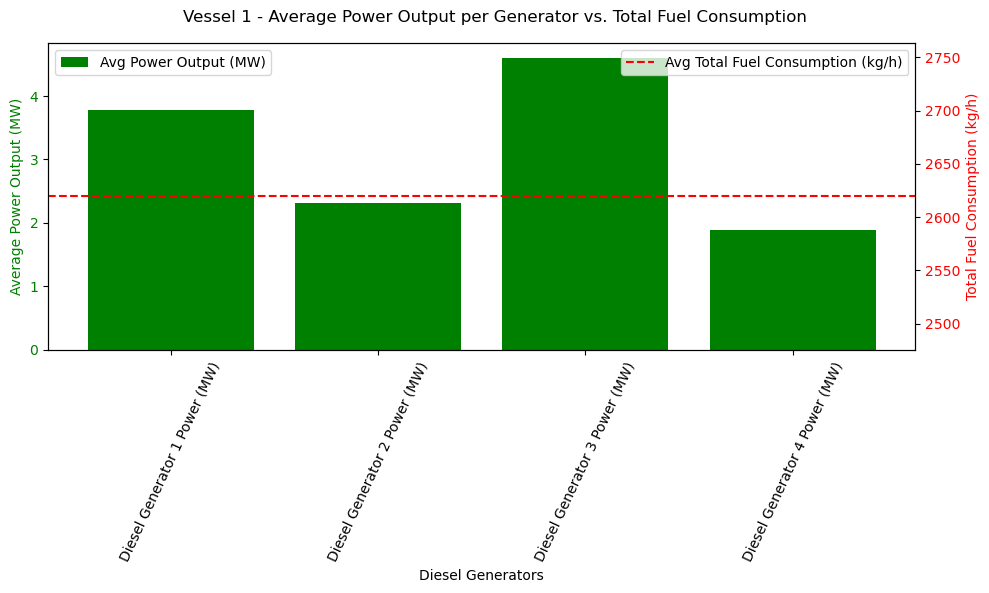

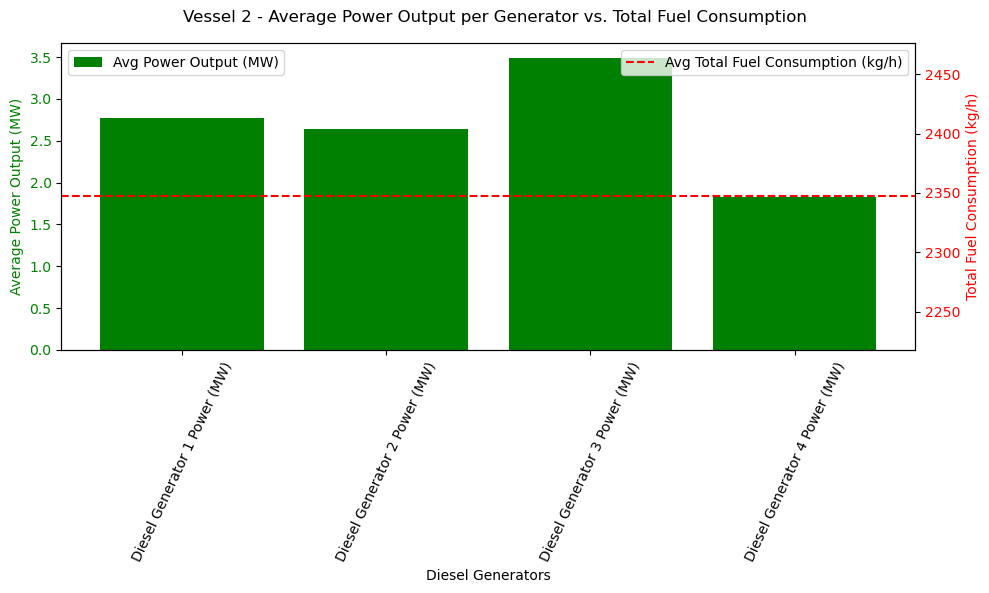

In [430]:
# Visualization: Dual Axis for Average Power Output per Generator vs. Total Fuel Consumption
for vessel in data_power_generation_summary['Vessel Name'].unique():
    vessel_data = data_power_generation_summary[data_power_generation_summary['Vessel Name'] == vessel]
    generator_power_columns = ['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)', 
                               'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)']
    power_values = vessel_data[generator_power_columns].values.flatten()
    fuel_value = vessel_data['Total Fuel Consumption (kg/h)'].values[0]
    
    # Dual-axis plot for power output of each diesel generator and total fuel flow rate
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot power on primary y-axis
    ax1.bar(generator_power_columns, power_values, color='g', label='Avg Power Output (MW)')
    ax1.set_xlabel('Diesel Generators',)
    ax1.set_ylabel('Average Power Output (MW)', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.tick_params(axis='x', labelrotation=65)
    
    # Plot fuel flow rate on secondary y-axis
    ax2 = ax1.twinx()
    ax2.axhline(y=fuel_value, color='red', linestyle='--', label='Avg Total Fuel Consumption (kg/h)')
    ax2.set_ylabel('Total Fuel Consumption (kg/h)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Title and Legends
    fig.suptitle(f'{vessel} - Average Power Output per Generator vs. Total Fuel Consumption')
    fig.tight_layout()  # Adjust layout to make space for dual axes
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()



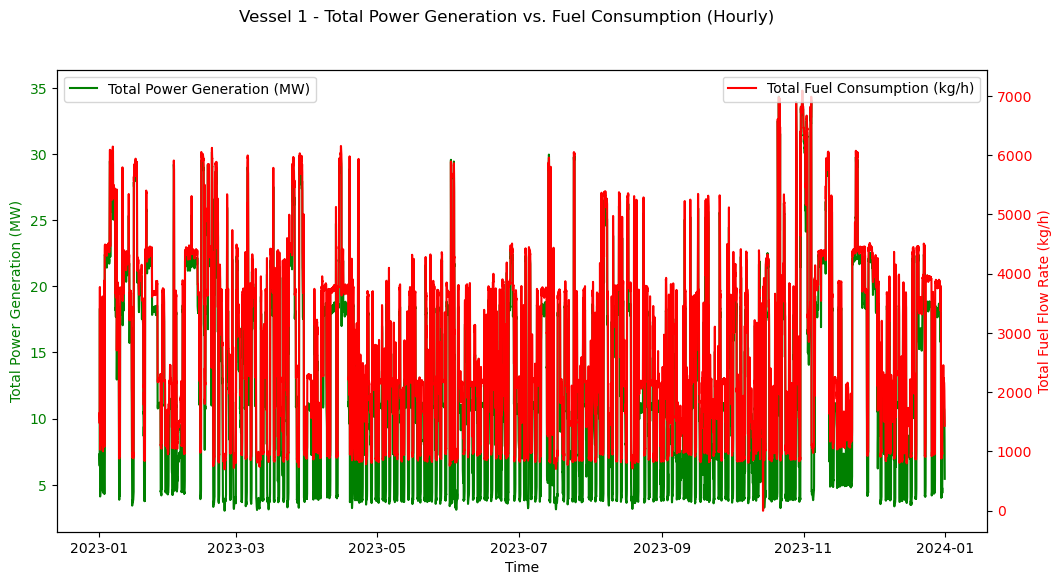

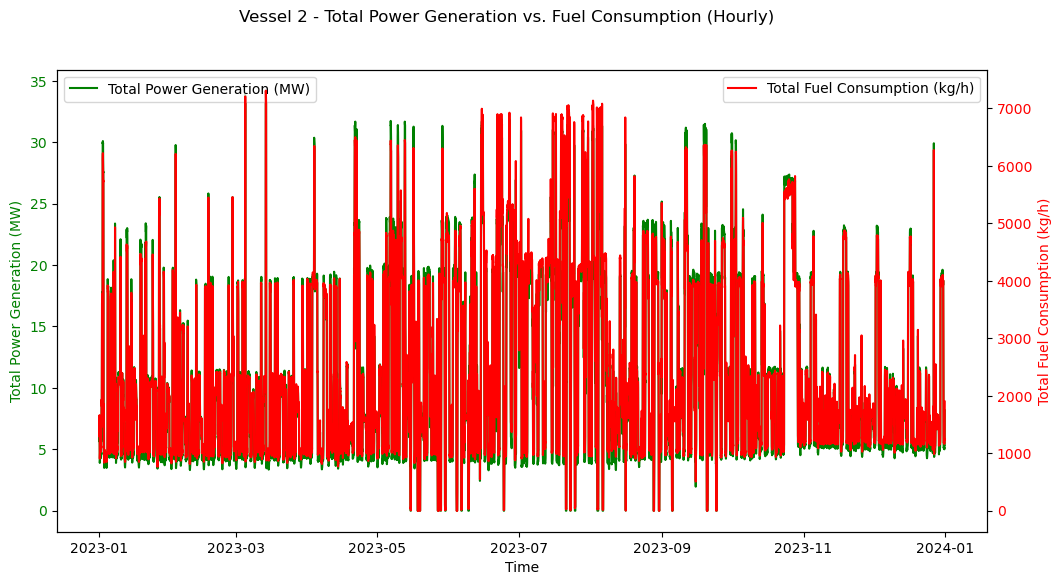

In [435]:
# Comparative Line Plot: Total Power Generation vs. Fuel Consumption Over Time
# Resample to hourly averages to visualize trends more clearly
data_power_generation.set_index(data['Start Time'], inplace=True)
hourly_data = data_power_generation.groupby('Vessel Name').resample('h').mean().reset_index()

# Plot for Vessel 1 with dual y-axis
vessel_1_data = hourly_data[hourly_data['Vessel Name'] == 'Vessel 1']
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(vessel_1_data['Start Time'], vessel_1_data['Total Power Generation (MW)'], label='Total Power Generation (MW)', color='g')
ax1.set_ylabel('Total Power Generation (MW)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(vessel_1_data['Start Time'], vessel_1_data['Total Fuel Consumption (kg/h)'], label='Total Fuel Consumption (kg/h)', color='red')
ax2.set_ylabel('Total Fuel Flow Rate (kg/h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Vessel 1 - Total Power Generation vs. Fuel Consumption (Hourly)')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# Plot for Vessel 2 with dual y-axis
vessel_2_data = hourly_data[hourly_data['Vessel Name'] == 'Vessel 2']
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(vessel_2_data['Start Time'], vessel_2_data['Total Power Generation (MW)'], label='Total Power Generation (MW)', color='g')
ax1.set_ylabel('Total Power Generation (MW)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(vessel_2_data['Start Time'], vessel_2_data['Total Fuel Consumption (kg/h)'], label='Total Fuel Consumption (kg/h)', color='red')
ax2.set_ylabel('Total Fuel Consumption (kg/h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Vessel 2 - Total Power Generation vs. Fuel Consumption (Hourly)')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
